# **Лабораторная работа 1.**
**Выполнил: Кириллов Данил**

**[Блокнот, взятый за основу](https://colab.research.google.com/drive/1exRabEgWLmXBIYgwhmIUhHuOEbmX0Qil?usp=sharing)**


# Отображатель графиков обучения

In [3]:
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import Callback
from IPython.display import clear_output
from tensorflow.keras import backend as K


class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.inter_dim = []
        self.val_inter_dim = []
        self.logits = []
        self.val_logits = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

        self.i += 1
        f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

        clear_output(wait=True)

        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss:" +
                 str(round(logs.get('loss'), 2)))
        ax1.plot(self.x, self.val_losses, label="v_loss:" +
                 str(round(logs.get('val_loss'), 2)))
        ax1.legend()

        ax2.plot(self.x, self.acc, label="acc:" +
                 str(round(logs.get('accuracy'), 2)))
        ax2.plot(self.x, self.val_acc, label="v_acc:" +
                 str(round(logs.get('val_accuracy'), 2)))
        ax2.legend()

        plt.savefig("fig")
        plt.show()


plot = PlotLearning()



# Загружаем и исследуем датасет

170498071/170498071 [==============================] - 11s 0us/step


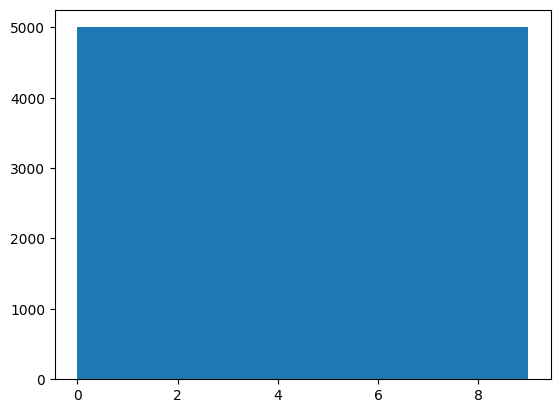

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
from __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import os
import tensorflow.keras as keras
import numpy as np

num_classes = 10

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

plt.hist(y_train, num_classes)
plt.show()

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train /= 255
x_test /= 255

# Создание и обучение модели
Создаем и обучаем полносвязную сеть

In [8]:
from tensorflow.keras.layers import Dropout, BatchNormalization, LayerNormalization, InputLayer, LeakyReLU

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))

model.add(Dense(128))
model.add(LayerNormalization())
model.add(Activation('softmax'))

model.add(Dense(128))
model.add(LayerNormalization())
model.add(Activation('softmax'))

model.add(Dense(128))
model.add(LayerNormalization())
model.add(Activation('softmax'))

model.add(Dropout(0.3))

model.add(Dense(64))
model.add(LayerNormalization())
model.add(Activation('softmax'))

model.add(Dense(64))
model.add(LayerNormalization())
model.add(Activation('softmax'))

model.add(Dense(64))
model.add(LayerNormalization())
model.add(Activation('softmax'))

model.add(Dropout(0.3)) # Удалить, если не сработает

model.add(Dense(64))
model.add(LayerNormalization())
model.add(Activation('softmax'))

model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# initiate optimizer
opt = keras.optimizers.Nadam(0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 layer_normalization_3 (Laye  (None, 128)              256       
 rNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 layer_normalization_4 (Laye  (None, 128)              256       
 rNormalization)                                      

Для модели было изменено количество слоев, количество нейронов, метод нормализации, оптимизатор, размер batch и количество эпох обучения. Также при борьбе с переобучением был добавлен метод Dropout.

1. Количество слоев: 8 (против 12 в исходном блокноте);
2. Количество нейронов в слое: 128 в первых 3 слоях, 64 в последующих слоях, 10 в выходном слое (против 32 в 11 первых слоях, 10 в выходном слое в исходном блокноте);
3. Метод нормализации: LayerNormalization (в исходном блокноте отсутствовал);
4. Оптимизатор: Nadam (классические Adam с той же скоростью обучения);
5. Bath: 75 (против 128 в исходном блокноте);
6. Кол-во эпох: 15 (против 30 в исходном блокноте);


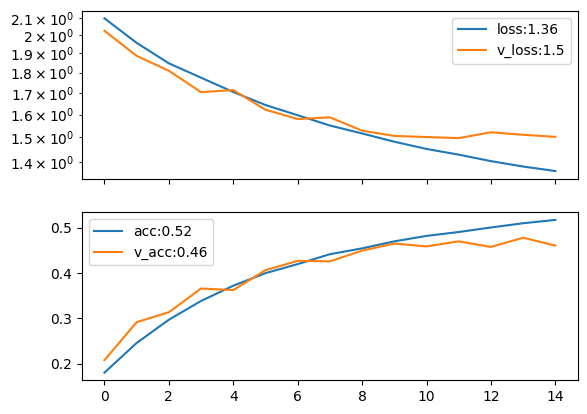

667/667 [==============================] - 21s 32ms/step - loss: 1.3649 - accuracy: 0.5170 - val_loss: 1.5026 - val_accuracy: 0.4605


In [9]:
print('Not using data augmentation.')
batch_size = 75
epochs = 15
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[plot]
          )

Как итог, спустя большое количество экспериментов с поиском оптимального количества слоев, нейронов и т.д., удалось подобрать такие параметры, что незначительно увеличилась точность модели (4%) и уменьшить потери (0.12).

# Отображение результата
Отобразим результат распознавания 10 случайных тестовых изображений

          GT class           Predicted class
1/1 [==============================] - 0s 229ms/step


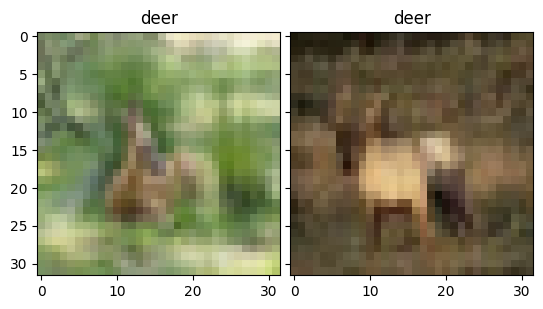

1/1 [==============================] - 0s 16ms/step


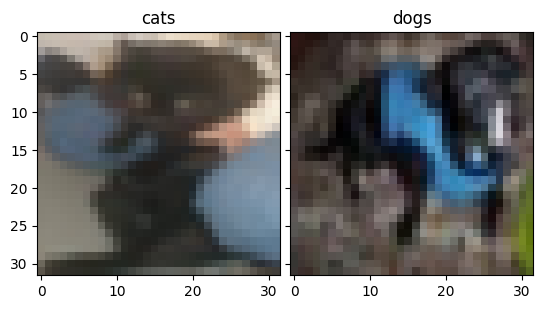

1/1 [==============================] - 0s 45ms/step


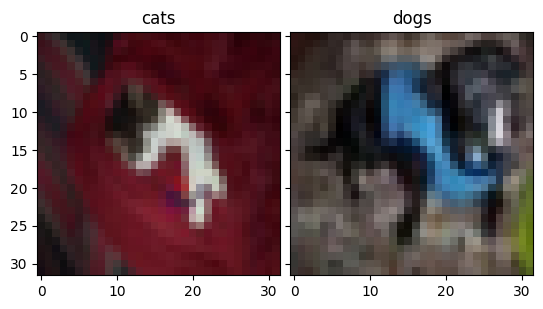

1/1 [==============================] - 0s 14ms/step


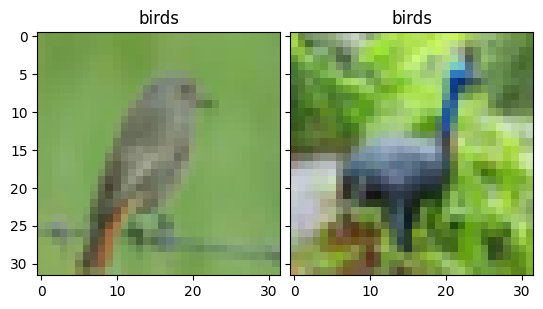

1/1 [==============================] - 0s 14ms/step


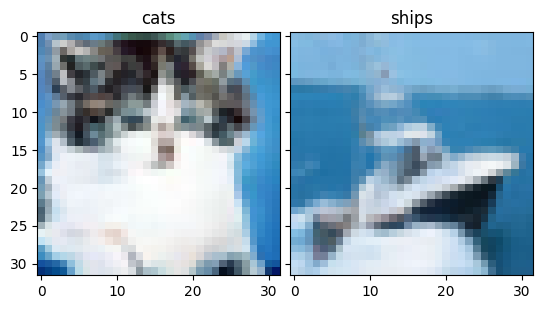

1/1 [==============================] - 0s 14ms/step


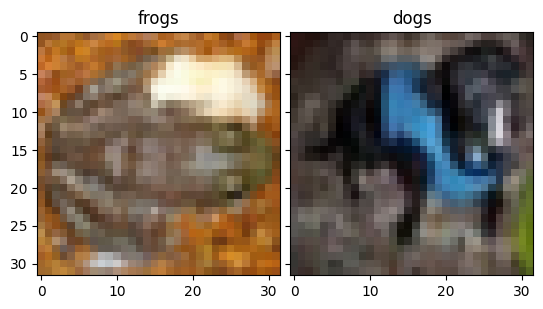

1/1 [==============================] - 0s 16ms/step


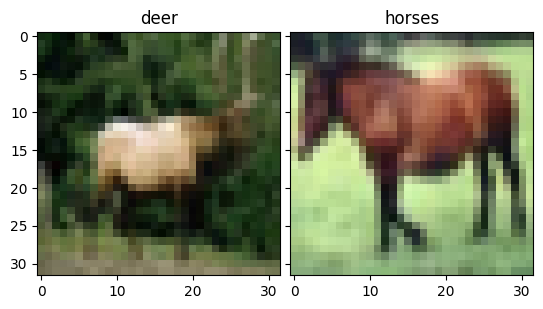

1/1 [==============================] - 0s 14ms/step


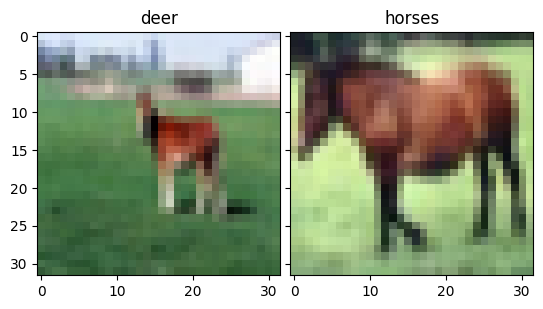

1/1 [==============================] - 0s 16ms/step


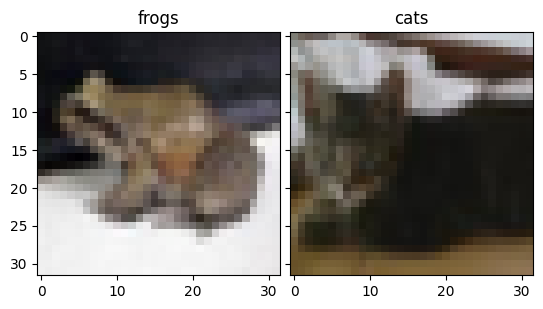

1/1 [==============================] - 0s 17ms/step


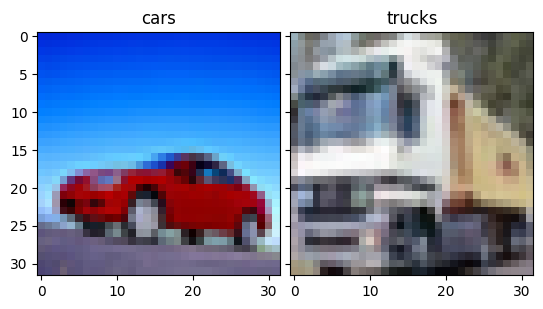

In [10]:
from matplotlib.colors import Colormap
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

class_list = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']

def get_class_sample(cls_index):
    for i in range(len(y_train)):
        if np.argmax(y_train[i]) == cls_index:
            return x_train[i]
    return None

print("          GT class           Predicted class")

for i in range(10):
    plt.set_cmap(Colormap("Greys"))
    fig = plt.figure(1, (4., 4.))
    grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.1,
                 )

    images = []
    np_images = []
    k = random.randint(0,len(x_test)-1)
    images.append(np.expand_dims(x_test[k], axis=0))
    np_images = np.vstack(images)
    y = model.predict(np_images)

    c = np.argmax(y[0])

    cls_name_pred = c
    cls_name_gt = np.argmax(y_test[k])

    img = x_test[k]
    img_pred = get_class_sample(cls_name_pred)
    grid[0].imshow(np.reshape(img,(32,32,3)))
    grid[0].set_title("{}".format(class_list[cls_name_gt]))
    grid[1].imshow(np.reshape(img_pred,(32,32,3)))
    grid[1].set_title("{}".format(class_list[cls_name_pred]))

    plt.show()



1/1 [==============================] - 0s 21ms/step


<Axes: >

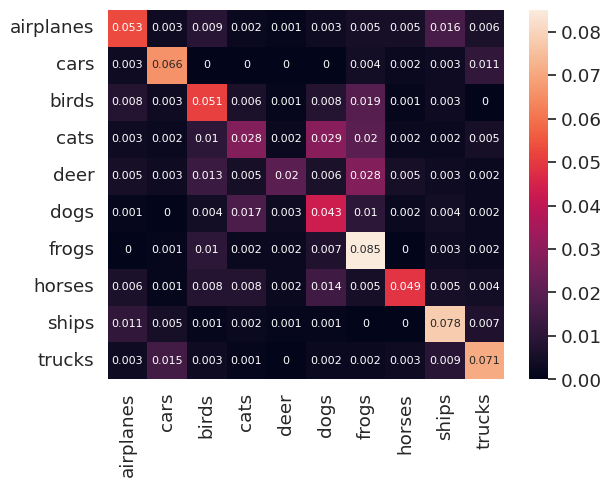

In [ ]:
import pandas as pd
import seaborn as sn

def get_conf_matrix(x_test, y_test):
    m = np.zeros((10,10))
    acc = 0
    i = 0
    for x in x_test:
        yp = np.argmax(model.predict(np.expand_dims(x, axis=0)))
        m[np.argmax(y_test[i]),yp] += 1
        i = i+1
    m = m/len(y_test)

    return m

m = get_conf_matrix(x_test[:1000], y_test[:1000])
df_cm = pd.DataFrame(m, class_list, class_list)
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8})

Загрузим и классифицируем произвольное изображение

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access '/content/drive/MyDrive/Colab Notebooks*.jpg': No such file or directory
(720, 1280, 3)
1/1 [==============================] - 0s 51ms/step
0.001574443 airplanes
0.9207766 cars
0.0010633111 birds
0.0009531832 cats
0.00059963093 deer
0.0008179912 dogs
0.0010770457 frogs
0.00047975432 horses
0.0053038825 ships
0.067354165 trucks


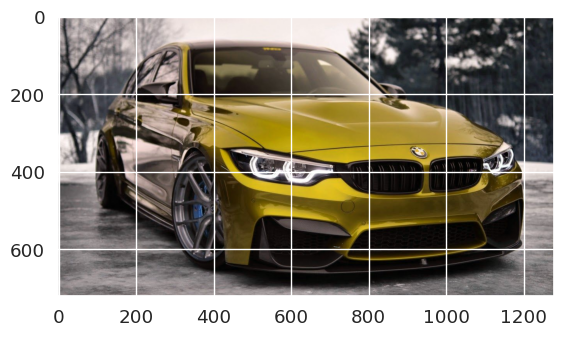

In [ ]:
import cv2
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/Colab\ Notebooks*.jpg

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/car.jpg")
print(img.shape)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = img[...,::-1]
img = cv2.resize(img,(32,32))
img = img.astype("float32")/255
y = model.predict(np.expand_dims(img,0))

for i, j in enumerate(y[0]):
  print(j, class_list[i])

# Итоги

В ходе работы:
1. Были проведены эксперименты с подбором параметров модели;
2. Был получен опыт с подбором параметров модели;
3. Удалось обучить модель таким образом, что произвольное изображение с автомобилем нейронная сеть классифицировала с 92% вероятностью. Хотя наиболее удачно модель классифицирует лягушек, корабли и грузовые автомобили.